# PREDICTING IF SOMEONE HAS DENTAL DISEASE OR NOT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

## LOAD THE DATA

In [2]:
data = pd.read_csv('dental-dataset.csv')

In [3]:
data.head(20)

,age,brush,tfb,bth,baef,bfs,smoke,smoke in a day,smokeless tobacco,drink alcohol,...,open packets,chewing pen,nail biting,grinding teeth,betel leaf-nut,bl in a day,toothpick,chocolate,diabetes,target
0,21,with toothpaste,2,No,No,Yes,Yes,3,No,No,...,No,No,No,No,Yes,2,Yes,Yes,No,No
1,22,with toothpaste,1,No,No,No,Yes,4,No,Yes,...,Yes,No,Yes,No,No,3,No,Yes,No,No
2,23,with toothpaste,2,Yes,No,Yes,Yes,2,Yes,Yes,...,Yes,No,Yes,No,No,0,Yes,Yes,Yes,Yes
3,23,with toothpaste,2,Yes,No,Yes,Yes,4,Yes,Yes,...,No,No,Yes,No,No,0,No,Yes,No,Yes
4,19,with toothpaste,1,Yes,No,Yes,Yes,6,No,Yes,...,No,No,No,Yes,No,0,Yes,No,No,Yes
5,24,with toothpaste,2,No,Yes,Yes,Yes,5,Yes,No,...,Yes,No,Yes,No,No,0,No,Yes,No,No
6,24,with toothpaste,3,Yes,No,Yes,Yes,6,No,No,...,No,No,No,No,No,0,No,Yes,No,Yes
7,26,with toothpaste,1,Yes,No,Yes,Yes,3,No,No,...,Yes,Yes,Yes,No,No,0,Yes,Yes,No,No
8,24,with toothpaste,1,No,No,No,Yes,1,No,Yes,...,Yes,No,No,No,No,0,No,Yes,No,Yes
9,23,with toothpaste,2,No,No,Yes,No,0,No,No,...,Yes,No,Yes,No,No,4,No,Yes,No,Yes


In [4]:
data.shape

(1012, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 26 columns):
age                      1012 non-null int64
brush                    1012 non-null object
tfb                      1012 non-null int64
bth                      1012 non-null object
baef                     1012 non-null object
bfs                      1012 non-null object
smoke                    1012 non-null object
smoke in a day           1012 non-null int64
smokeless tobacco        1012 non-null object
drink alcohol            1012 non-null object
coffee                   1012 non-null object
coffee with/out suger    1012 non-null object
sweet                    1012 non-null object
fastfood                 1012 non-null object
binge eating             1012 non-null object
soft drinks-soda         992 non-null float64
open packets             1012 non-null object
chewing pen              1012 non-null object
nail biting              1012 non-null object
grinding teeth        

### CHECKING MISSING VALUES

In [6]:
data.isna().sum()

age                       0
brush                     0
tfb                       0
bth                       0
baef                      0
bfs                       0
smoke                     0
smoke in a day            0
smokeless tobacco         0
drink alcohol             0
coffee                    0
coffee with/out suger     0
sweet                     0
fastfood                  0
binge eating              0
soft drinks-soda         20
open packets              0
chewing pen               0
nail biting               0
grinding teeth            0
betel leaf-nut            0
bl in a day               0
toothpick                 0
chocolate                 0
diabetes                  0
target                    0
dtype: int64

In [7]:
data['soft drinks-soda'].value_counts()

1.0    369
2.0    310
3.0    306
0.0      7
Name: soft drinks-soda, dtype: int64

In [8]:
"""
Soft drink people use to eat daily.
"""

'\nSoft drink people use to eat daily.\n'

In [9]:
average_soft_drinks = round(np.mean(data['soft drinks-soda'])) #average people drink soft drinks daily

In [10]:
average_soft_drinks

2

In [11]:
#filling all the missing values with mean for data['soft drinks-soda']

In [12]:
data['soft drinks-soda'].fillna(average_soft_drinks,inplace=True)

In [13]:
#Checking missing values again

In [14]:
data.isna().sum()

age                      0
brush                    0
tfb                      0
bth                      0
baef                     0
bfs                      0
smoke                    0
smoke in a day           0
smokeless tobacco        0
drink alcohol            0
coffee                   0
coffee with/out suger    0
sweet                    0
fastfood                 0
binge eating             0
soft drinks-soda         0
open packets             0
chewing pen              0
nail biting              0
grinding teeth           0
betel leaf-nut           0
bl in a day              0
toothpick                0
chocolate                0
diabetes                 0
target                   0
dtype: int64

In [15]:
np.sum(data.isna().sum()) #There is no missing values

0

In [16]:
## MAPPING THE TARGET/LABEL COLUMN

In [17]:
data['target'].value_counts()

Yes    608
No     404
Name: target, dtype: int64

In [18]:
# GIVING YES = 1 and No= 0 ( IF yes they has dental disease and if 0 they dont have dental disease)

In [19]:
data['target'] = data['target'].map({'Yes':1,'No':0})

In [20]:
data['target'].value_counts()

1    608
0    404
Name: target, dtype: int64

In [21]:
data['coffee with/out suger'].value_counts()

with sugar       473
with suger       287
without sugar    121
none              86
without suger     45
Name: coffee with/out suger, dtype: int64

In [22]:
# we can see in this column 'featurs are wrong' better to drop this column...

In [23]:
data.drop('coffee with/out suger',axis=1,inplace=True)

In [24]:
#Visualizing it to get a better view

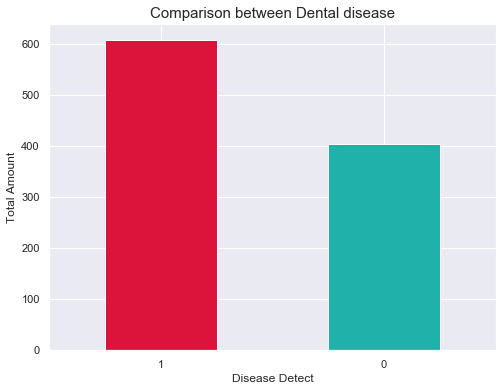

In [25]:
plt.figure(figsize=(8,6))
data['target'].value_counts().plot(kind='bar',color=['crimson','lightseagreen'])
plt.title('Comparison between Dental disease',fontsize=15)

plt.ylabel('Total Amount')
plt.xlabel('Disease Detect')

plt.xticks(rotation=0)
plt.show()

## Exploring Feature

* checking age with target columns

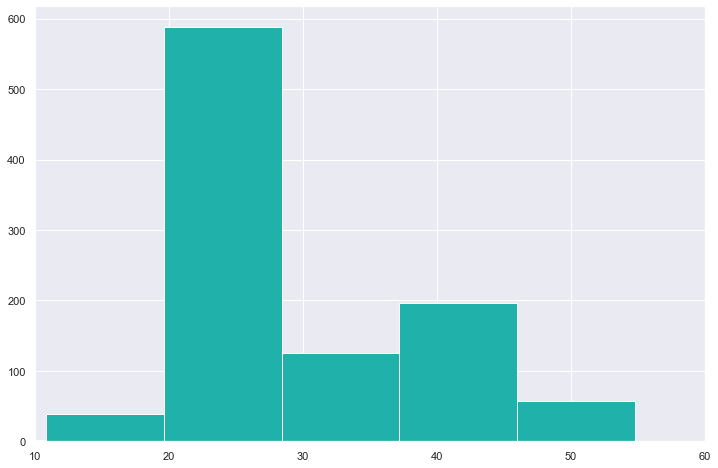

In [26]:
#checking distribution of ages
plt.figure(figsize=(12,8))
data['age'].hist(color=['lightseagreen'])
plt.xlim(10,60)
plt.show()

In [27]:
#checking which ages people has the highest frequency to have dental disease

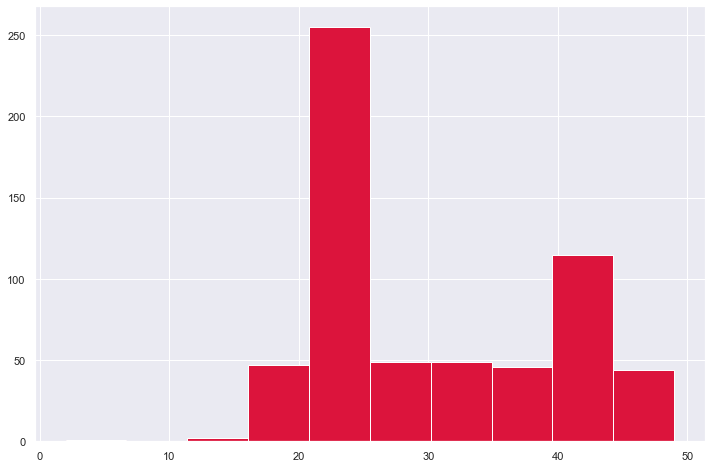

In [28]:

## all the people that has dental disease #according to age
data['age'][data['target']==1].hist(color=['crimson'],figsize=(12,8));





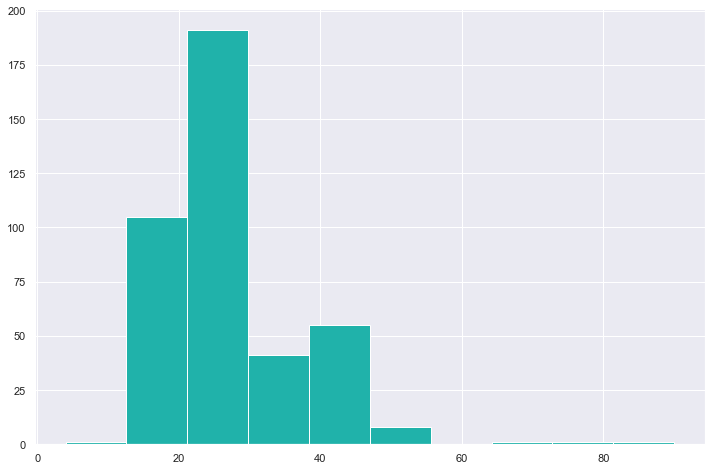

In [29]:
#all the people that has no dental disease #according to age
data['age'][data['target']==0].hist(color=['lightseagreen'],figsize=(12,8));

In [30]:
#we can see from this data around ages 20 to 30 and 40 to 50 ages people are more likely to have dental disease

In [31]:
### Checking a crosstab with target

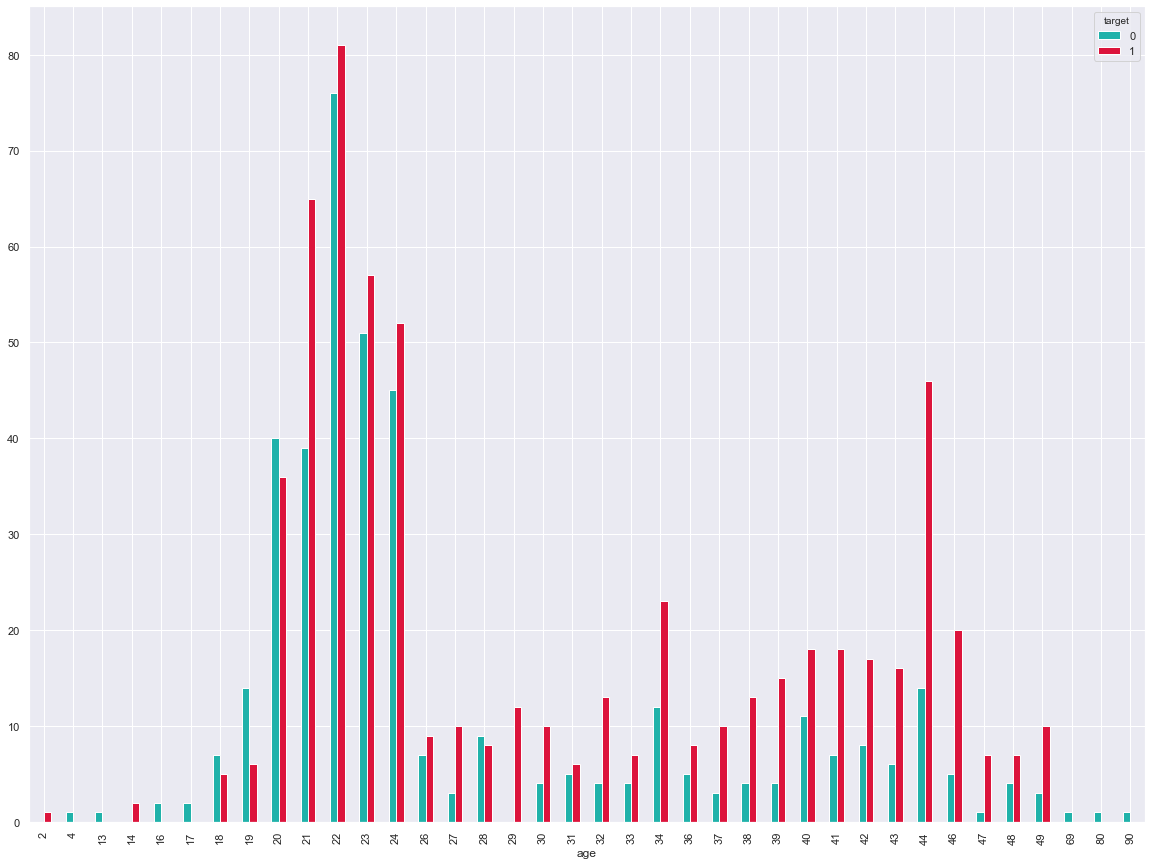

In [32]:

pd.crosstab(data['age'],data['target']).plot(kind='bar',figsize=(20,15),color=['lightseagreen','crimson'])
plt.show()

In [33]:
#we can more determine about the dental disease

### Next Column

In [34]:
data['brush'].value_counts()

with toothpaste      931
with tooth powder     27
no specific           23
with coal             16
with miswak           15
Name: brush, dtype: int64

In [35]:
#doing crosstab to understand better about this column

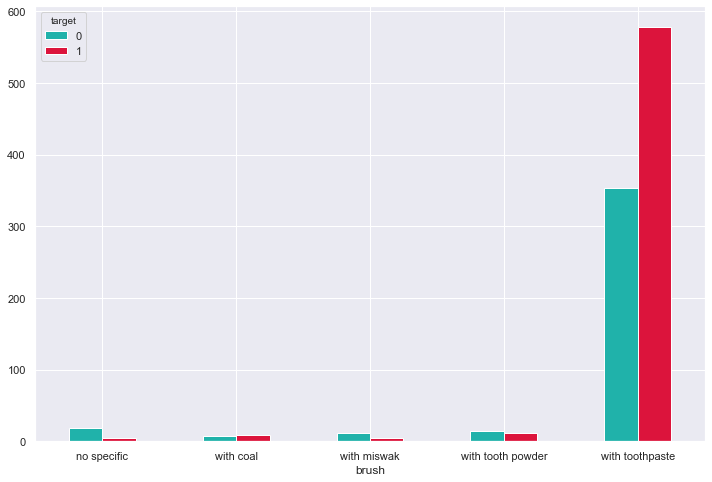

In [36]:
pd.crosstab(data['brush'],data['target']).plot(kind='bar',figsize=(12,8),color=['lightseagreen','crimson'])
plt.xticks(rotation=0)
plt.show()

# We can see people with using the tootpaste has higher frequency has dental problem
* now a days everyone using toothpaste so it's common factor. 
* Might drop this column in future

# next Column ( Total minute used to brush teeth) tfb
* 1 minute
* 2 minute
* 3 minute

In [37]:
data['tfb'].value_counts()

1    802
2    152
3     58
Name: tfb, dtype: int64

In [38]:
#corsstab

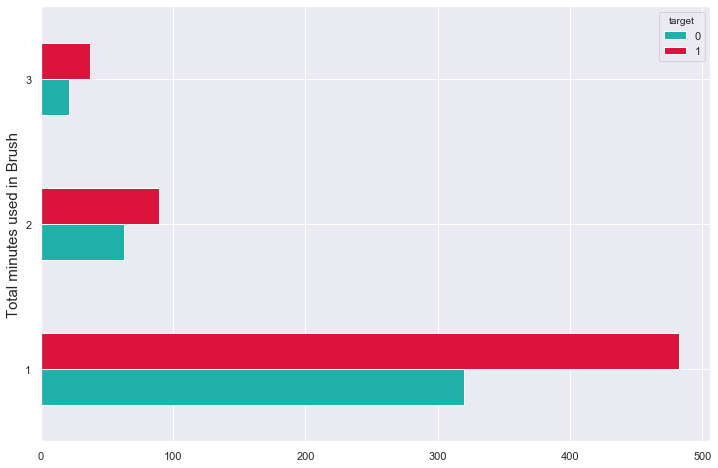

In [39]:
pd.crosstab(data['tfb'],data['target']).plot(kind='barh',color=['lightseagreen','crimson'],figsize=(12,8))
plt.ylabel('Total minutes used in Brush',fontsize=15)
plt.show()

In [40]:
# So, people who brush 1 minutes or less they are more likely to have dental disease

In [41]:
#Doing some research on google it has been studied that smoking is the most common factor for dental disease . 

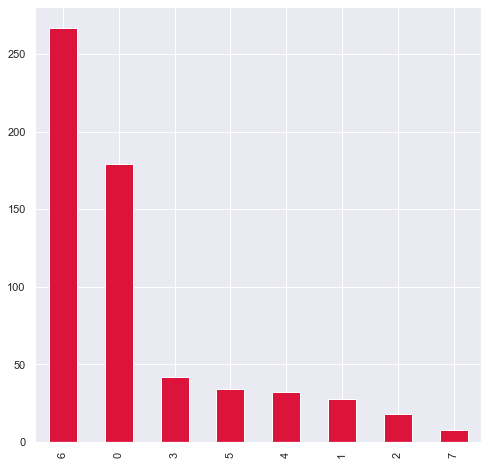

In [42]:
data['smoke in a day'][data['target']==1].value_counts().plot(kind='bar',figsize=(8,8),color=['crimson']);

In [43]:
#as we can see people who don't smoke in a day and who smoke more than 6 are more likely to have dental disease


In [44]:
#Here we can see some unexpected data . people who are eating 7 cigarette per day are less likely to have dental disease 
# which is kind of odd. Going to replace all 7 values to 0

In [45]:
data['smoke in a day'].replace(7,0,inplace=True)

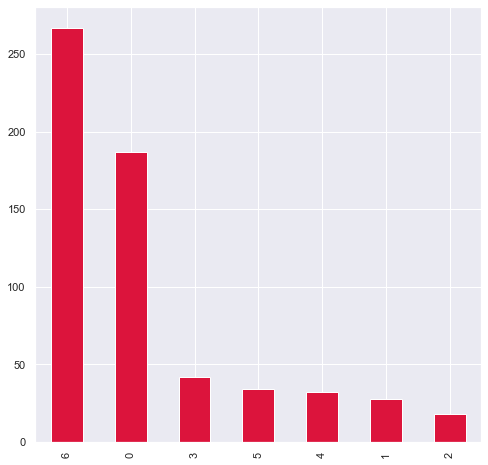

In [46]:
data['smoke in a day'][data['target']==1].value_counts().plot(kind='bar',figsize=(8,8),color=['crimson']);

## Now some column that we need to drop

* 'smoke' column which is binary (yes,no) and 'smoke in a day' column which are supposed to be same. so going to drop 'smoke' column
* 'smokeless tobacco' column is also a part of smoking category so going to drop this one too 


In [47]:
data_new = data.copy()

In [48]:
data_new.drop(['smoke','smokeless tobacco'],axis=1,inplace=True)

In [49]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 23 columns):
age                 1012 non-null int64
brush               1012 non-null object
tfb                 1012 non-null int64
bth                 1012 non-null object
baef                1012 non-null object
bfs                 1012 non-null object
smoke in a day      1012 non-null int64
drink alcohol       1012 non-null object
coffee              1012 non-null object
sweet               1012 non-null object
fastfood            1012 non-null object
binge eating        1012 non-null object
soft drinks-soda    1012 non-null float64
open packets        1012 non-null object
chewing pen         1012 non-null object
nail biting         1012 non-null object
grinding teeth      1012 non-null object
betel leaf-nut      1012 non-null object
bl in a day         1012 non-null int64
toothpick           1012 non-null object
chocolate           1012 non-null object
diabetes            1012 non-null o

In [50]:
## Now column name 'Betal leaf/nut' and 'Bl in a day' which define exactly same thing so going to drop 'Betal leaf/nut' column

## Going to check the authentic column which has more explanatory power

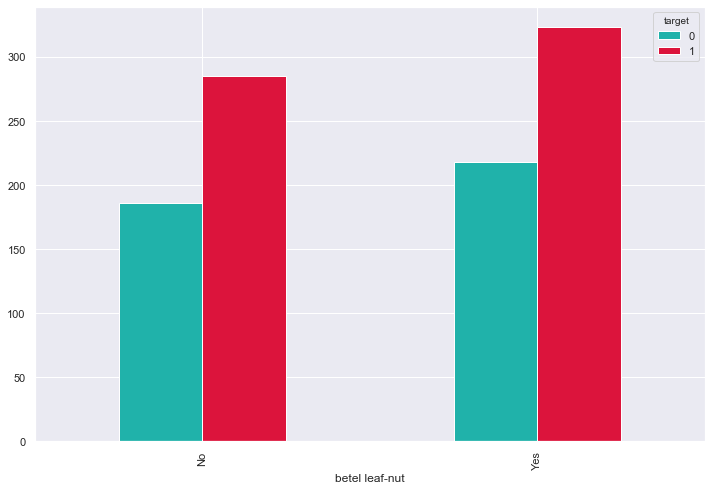

In [51]:
pd.crosstab(data_new['betel leaf-nut'],data_new['target']).plot(kind='bar',color=['lightseagreen','crimson'],figsize=(12,8));

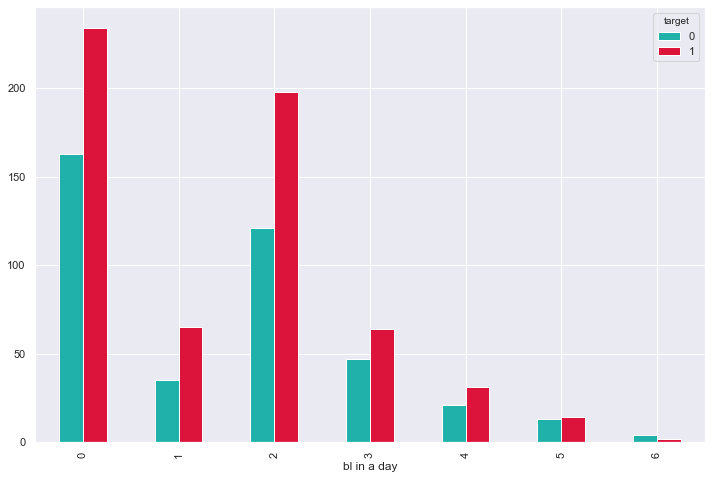

In [52]:
#crosstab with ['bl in a day'] with ['target']
pd.crosstab(data_new['bl in a day'],data_new['target']).plot(kind='bar',color=['lightseagreen','crimson'],figsize=(12,8));

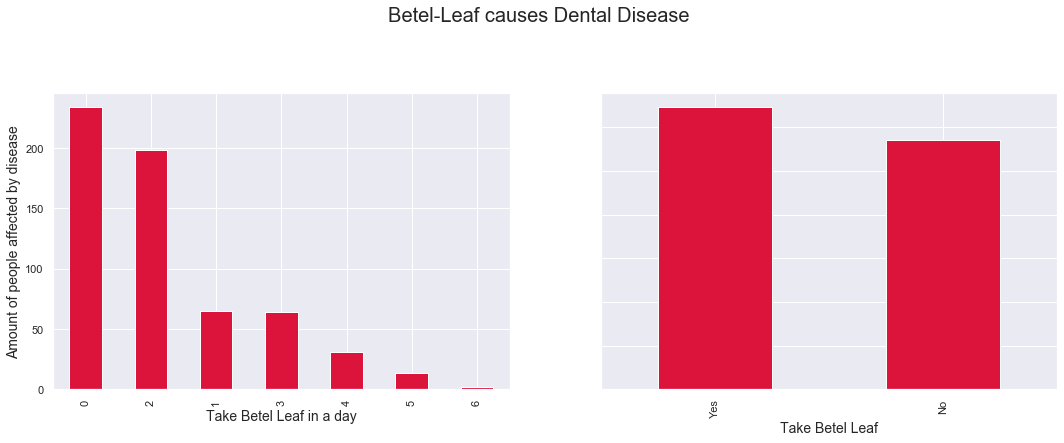

In [53]:

plt.subplot(2,2,1)
data_new['bl in a day'][data['target']==1].value_counts().plot(kind='bar',color=['crimson'],figsize=(18,12))
plt.xlabel('Take Betel Leaf in a day',fontsize=14)
plt.ylabel('Amount of people affected by disease',fontsize=14)



plt.subplot(2,2,2)
data_new['betel leaf-nut'][data['target']==1].value_counts().plot(kind='bar',color=['crimson'],sharey=True,figsize=(18,12))
plt.xlabel('Take Betel Leaf',fontsize=14)



plt.suptitle('Betel-Leaf causes Dental Disease',fontsize=20)
plt.show()

In [54]:
#the left side data doesn't make any sense. It says people who take 0 beter leaf has more dental disease than who does take 6 betel
# leaf. So, this column should be dropped

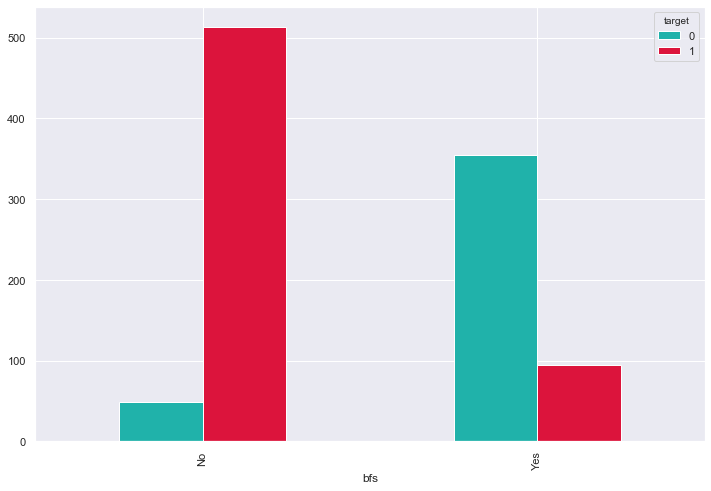

In [55]:
pd.crosstab(data_new['bfs'],data_new['target']).plot(kind='bar',color=['lightseagreen','crimson'],figsize=(12,8));

In [56]:
# So, people who doesnt brush AT BEFORE SLEEP have dental disease

In [57]:
data2 = data_new.copy()

In [58]:
data2.drop('bl in a day',axis=1,inplace=True)

In [59]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 22 columns):
age                 1012 non-null int64
brush               1012 non-null object
tfb                 1012 non-null int64
bth                 1012 non-null object
baef                1012 non-null object
bfs                 1012 non-null object
smoke in a day      1012 non-null int64
drink alcohol       1012 non-null object
coffee              1012 non-null object
sweet               1012 non-null object
fastfood            1012 non-null object
binge eating        1012 non-null object
soft drinks-soda    1012 non-null float64
open packets        1012 non-null object
chewing pen         1012 non-null object
nail biting         1012 non-null object
grinding teeth      1012 non-null object
betel leaf-nut      1012 non-null object
toothpick           1012 non-null object
chocolate           1012 non-null object
diabetes            1012 non-null object
target              1012 non-null 

## CONVERTING ALL OBJECT DATA TYPES TO NUMERIC 

In [60]:
def convert_cat_numeric(df):
    for label,content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
                #df[label] = content.astype('category').cat.as_ordered()
                df[label] = pd.Categorical(content).codes
    return df

In [61]:
data_clean = data2.copy()

In [62]:
convert_cat_numeric(data_clean)

,age,brush,tfb,bth,baef,bfs,smoke in a day,drink alcohol,coffee,sweet,...,soft drinks-soda,open packets,chewing pen,nail biting,grinding teeth,betel leaf-nut,toothpick,chocolate,diabetes,target
0,21,4,2,0,0,1,3,0,1,0,...,1.0,0,0,0,0,1,1,1,0,0
1,22,4,1,0,0,0,4,1,1,1,...,2.0,1,0,1,0,0,0,1,0,0
2,23,4,2,1,0,1,2,1,1,0,...,3.0,1,0,1,0,0,1,1,1,1
3,23,4,2,1,0,1,4,1,1,0,...,1.0,0,0,1,0,0,0,1,0,1
4,19,4,1,1,0,1,6,1,0,0,...,3.0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,40,4,1,1,1,1,6,1,0,0,...,2.0,0,1,0,0,1,1,0,1,0
1008,24,4,1,1,1,0,0,1,1,0,...,2.0,0,0,1,0,1,0,0,0,1
1009,20,4,1,0,0,0,0,0,1,1,...,3.0,1,0,1,0,0,0,1,0,1
1010,32,4,1,0,0,0,0,0,1,1,...,1.0,1,0,1,0,0,0,1,0,1


In [63]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 22 columns):
age                 1012 non-null int64
brush               1012 non-null int8
tfb                 1012 non-null int64
bth                 1012 non-null int8
baef                1012 non-null int8
bfs                 1012 non-null int8
smoke in a day      1012 non-null int64
drink alcohol       1012 non-null int8
coffee              1012 non-null int8
sweet               1012 non-null int8
fastfood            1012 non-null int8
binge eating        1012 non-null int8
soft drinks-soda    1012 non-null float64
open packets        1012 non-null int8
chewing pen         1012 non-null int8
nail biting         1012 non-null int8
grinding teeth      1012 non-null int8
betel leaf-nut      1012 non-null int8
toothpick           1012 non-null int8
chocolate           1012 non-null int8
diabetes            1012 non-null int8
target              1012 non-null int64
dtypes: float64(1), int64(4)

### CHECKING CO-Relation of Features

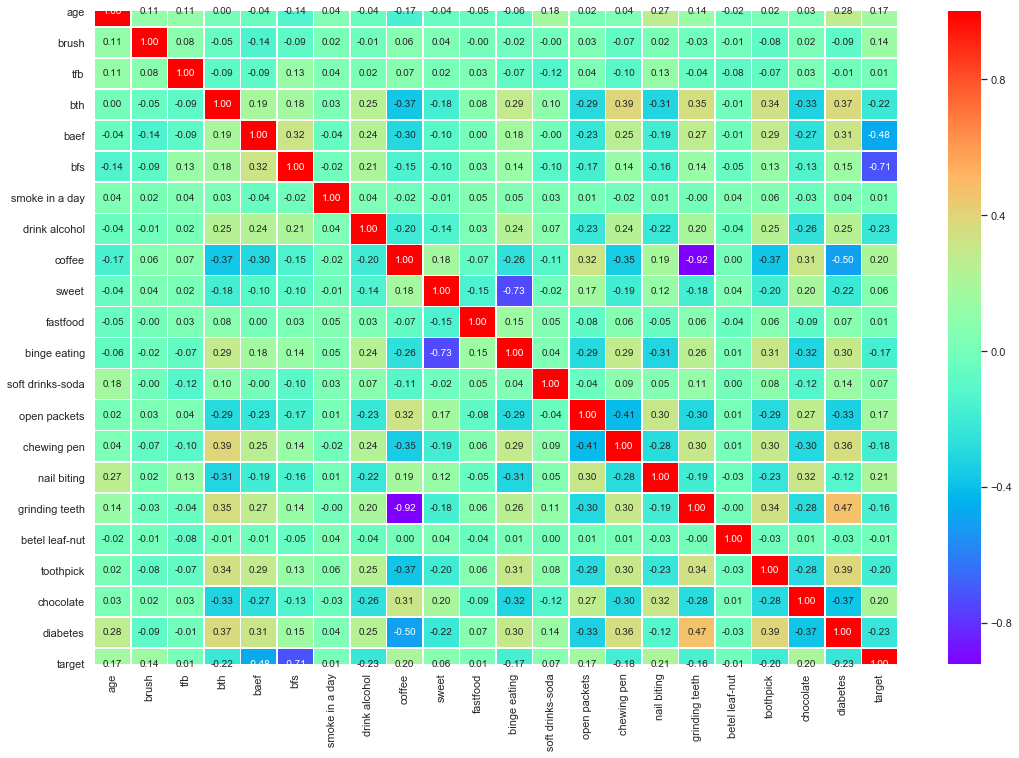

In [64]:
corr_matrix = data_clean.corr()
fig,ax = plt.subplots(figsize=(18,12))

ax  = sns.heatmap(corr_matrix,annot=True,linewidths = 0.5, fmt ='.2f', cmap='rainbow' )

plt.show()

In [65]:
#relation with target
data_clean.corr()['target'].sort_values(ascending=True)

bfs                -0.712006
baef               -0.475960
diabetes           -0.233495
drink alcohol      -0.226399
bth                -0.217066
toothpick          -0.199134
chewing pen        -0.177781
binge eating       -0.171039
grinding teeth     -0.163974
betel leaf-nut     -0.008202
tfb                 0.007213
smoke in a day      0.013181
fastfood            0.014735
sweet               0.064679
soft drinks-soda    0.066272
brush               0.139216
age                 0.165352
open packets        0.171443
coffee              0.203999
chocolate           0.204629
nail biting         0.209250
target              1.000000
Name: target, dtype: float64

In [66]:
#positive corelation = if the value increase the target should increase
#negative corelation = if the value increase the target should drecrease
# zero means there is no corelation



In [67]:
### We can see there a negative corelation with "BFS" (Brush before sleep) with target column which is = -0.71
# better to drop this column

In [68]:
data2['bfs'][data2['target']==1].value_counts()

No     513
Yes     95
Name: bfs, dtype: int64

In [69]:
## Data showing only 1 data that did brush at before sleep has dental disease , others doesn't have dental disease. which is a outlier
## removing this column

In [70]:
data_clean.drop('bfs',axis=1,inplace=True)

In [71]:
data_clean['baef'][data2['target']==1].value_counts()

0    533
1     75
Name: baef, dtype: int64

In [72]:
#need to remove this column too
data_clean.drop('baef',axis=1,inplace=True)

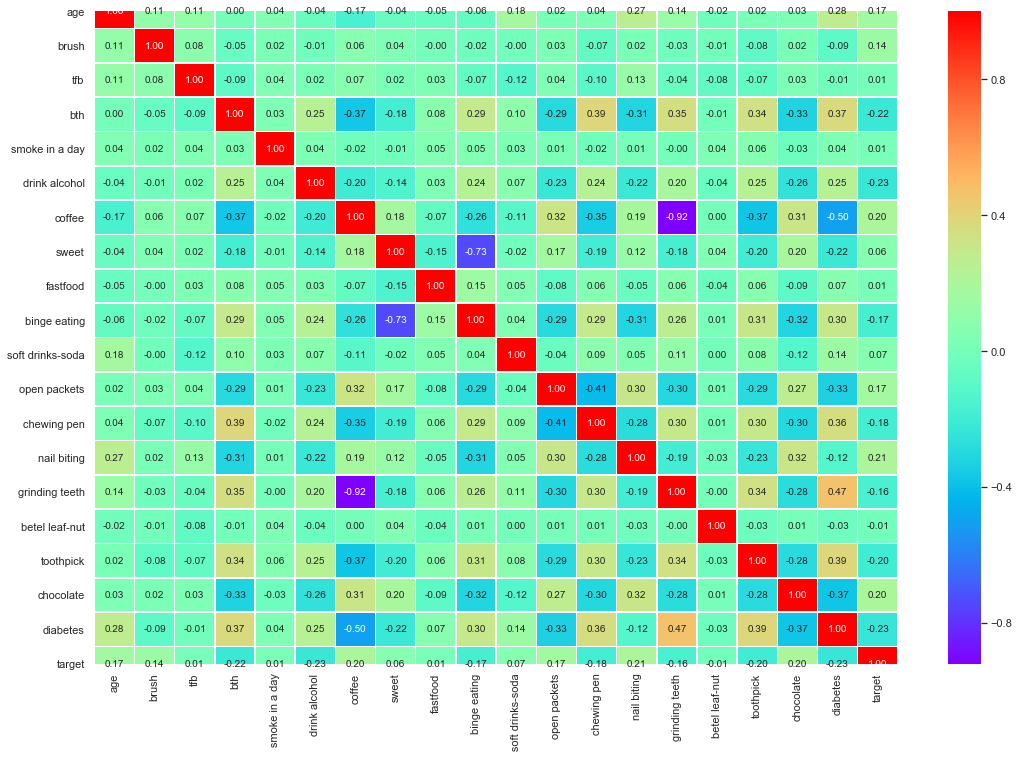

In [73]:
#checking the co relation heatmap again 
corr_matrix = data_clean.corr()
fig,ax = plt.subplots(figsize=(18,12))

ax  = sns.heatmap(corr_matrix,annot=True,linewidths = 0.5, fmt ='.2f', cmap='rainbow' )

plt.show()

# THE DATA IS READY FOR MACHINE LEARNING

In [74]:
data_clean.to_csv('clean_data.csv',index=False)